In [19]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet


In [20]:
chicago_df_1 = pd.read_csv('/content/Chicago_Crimes_2005_to_2007.csv', on_bad_lines='skip')
chicago_df_2 = pd.read_csv('/content/Chicago_Crimes_2008_to_2011.csv', on_bad_lines='skip')
chicago_df_3 = pd.read_csv('/content/Chicago_Crimes_2012_to_2017.csv', on_bad_lines='skip')



In [21]:
chicago_df_1.shape

(1872343, 23)

In [22]:
chicago_df_2.shape

(2688710, 23)

In [23]:
chicago_df_3.shape

(1456714, 23)

In [24]:
chicago_df = pd.concat([chicago_df_1, chicago_df_2, chicago_df_3], ignore_index=True)


In [25]:
chicago_df.shape

(6017767, 23)

In [26]:
chicago_df.head(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,0,4673626,HM274058,04/02/2006 01:00:00 PM,055XX N MANGO AVE,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,45.0,11.0,26,1136872.0,1936499.0,2006,04/15/2016 08:55:02 AM,41.981913,-87.771996,"(41.981912692, -87.771996382)"
1,1,4673627,HM202199,02/26/2006 01:40:48 PM,065XX S RHODES AVE,2017,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,...,20.0,42.0,18,1181027.0,1861693.0,2006,04/15/2016 08:55:02 AM,41.775733,-87.611920,"(41.775732538, -87.611919814)"
2,2,4673628,HM113861,01/08/2006 11:16:00 PM,013XX E 69TH ST,051A,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,...,5.0,69.0,04A,1186023.0,1859609.0,2006,04/15/2016 08:55:02 AM,41.769897,-87.593671,"(41.769897392, -87.593670899)"
3,4,4673629,HM274049,04/05/2006 06:45:00 PM,061XX W NEWPORT AVE,0460,BATTERY,SIMPLE,RESIDENCE,False,...,38.0,17.0,08B,1134772.0,1922299.0,2006,04/15/2016 08:55:02 AM,41.942984,-87.780057,"(41.942984005, -87.780056951)"
4,5,4673630,HM187120,02/17/2006 09:03:14 PM,037XX W 60TH ST,1811,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,...,13.0,65.0,18,1152412.0,1864560.0,2006,04/15/2016 08:55:02 AM,41.784211,-87.716745,"(41.784210853, -87.71674491)"
5,6,4673631,HM263167,03/30/2006 10:30:00 PM,014XX W 73RD PL,0560,ASSAULT,SIMPLE,APARTMENT,True,...,17.0,67.0,08A,1167688.0,1855998.0,2006,04/15/2016 08:55:02 AM,41.760401,-87.660982,"(41.760401372, -87.660982392)"
6,7,4673632,HM273234,04/05/2006 12:10:00 PM,050XX N LARAMIE AVE,0460,BATTERY,SIMPLE,"SCHOOL, PUBLIC, BUILDING",True,...,45.0,11.0,08B,1140791.0,1932993.0,2006,04/15/2016 08:55:02 AM,41.972221,-87.757670,"(41.972220564, -87.75766982)"
7,8,4673633,HM275105,04/05/2006 03:00:00 PM,067XX S ROCKWELL ST,0820,THEFT,$500 AND UNDER,STREET,False,...,15.0,66.0,06,1160205.0,1859776.0,2006,04/15/2016 08:55:02 AM,41.770926,-87.688304,"(41.770925978, -87.688304107)"
8,9,4673634,HM275063,04/05/2006 09:30:00 PM,019XX W CHICAGO AVE,0560,ASSAULT,SIMPLE,PARKING LOT/GARAGE(NON.RESID.),False,...,32.0,24.0,08A,1163122.0,1905349.0,2006,04/15/2016 08:55:02 AM,41.895923,-87.676334,"(41.895922672, -87.676333733)"
9,10,4673635,HM268513,04/03/2006 03:00:00 AM,063XX S EBERHART AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,20.0,42.0,08B,1180669.0,1863047.0,2006,04/15/2016 08:55:02 AM,41.779456,-87.613191,"(41.77945628, -87.613190628)"


In [27]:
chicago_df.tail(10)

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
6017757,6249417,10508666,HZ250497,05/03/2016 11:30:00 PM,053XX S PULASKI RD,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,23.0,62.0,03,1150606.0,1868988.0,2016,05/10/2016 03:56:50 PM,41.796397,-87.723251,"(41.79639731, -87.723251281)"
6017758,6249592,10508671,HZ250526,05/03/2016 11:50:00 PM,036XX E 106TH ST,502P,OTHER OFFENSE,FALSE/STOLEN/ALTERED TRP,ALLEY,True,...,10.0,52.0,26,1202327.0,1835278.0,2016,05/10/2016 03:56:50 PM,41.702731,-87.534736,"(41.702731182, -87.534736413)"
6017759,6249615,10508672,HZ250441,05/03/2016 10:25:00 PM,071XX S MOZART ST,0460,BATTERY,SIMPLE,SIDEWALK,True,...,18.0,66.0,08B,1158610.0,1857066.0,2016,05/10/2016 03:56:50 PM,41.763522,-87.694225,"(41.763522012, -87.69422464)"
6017760,6249936,10508675,HZ250502,05/03/2016 11:00:00 PM,085XX S MAY ST,0320,ROBBERY,STRONGARM - NO WEAPON,SIDEWALK,False,...,21.0,71.0,03,1170146.0,1848113.0,2016,05/10/2016 03:56:50 PM,41.738711,-87.652203,"(41.738710803, -87.652202523)"
6017761,6250154,10508678,HZ250481,05/03/2016 11:28:00 PM,088XX S LAFLIN ST,041A,BATTERY,AGGRAVATED: HANDGUN,STREET,False,...,21.0,71.0,04B,1167880.0,1846134.0,2016,05/10/2016 03:56:50 PM,41.733329,-87.660561,"(41.733329054, -87.660561367)"
6017762,6250330,10508679,HZ250507,05/03/2016 11:33:00 PM,026XX W 23RD PL,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,...,28.0,30.0,08B,1159105.0,1888300.0,2016,05/10/2016 03:56:50 PM,41.849222,-87.691556,"(41.849222028, -87.69155551)"
6017763,6251089,10508680,HZ250491,05/03/2016 11:30:00 PM,073XX S HARVARD AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,...,17.0,69.0,14,1175230.0,1856183.0,2016,05/10/2016 03:56:50 PM,41.760744,-87.633335,"(41.760743949, -87.63333531)"
6017764,6251349,10508681,HZ250479,05/03/2016 12:15:00 AM,024XX W 63RD ST,041A,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,...,15.0,66.0,04B,1161027.0,1862810.0,2016,05/10/2016 03:56:50 PM,41.779235,-87.685207,"(41.779234743, -87.685207125)"
6017765,6253257,10508690,HZ250370,05/03/2016 09:07:00 PM,082XX S EXCHANGE AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,7.0,46.0,08B,1197261.0,1850727.0,2016,05/10/2016 03:56:50 PM,41.745252,-87.552773,"(41.745251975, -87.552773464)"
6017766,6253474,10508692,HZ250517,05/03/2016 11:38:00 PM,001XX E 75TH ST,5007,OTHER OFFENSE,OTHER WEAPONS VIOLATION,PARKING LOT/GARAGE(NON.RESID.),True,...,6.0,69.0,26,1178696.0,1855324.0,2016,05/10/2016 03:56:50 PM,41.758309,-87.620658,"(41.75830866, -87.620658418)"


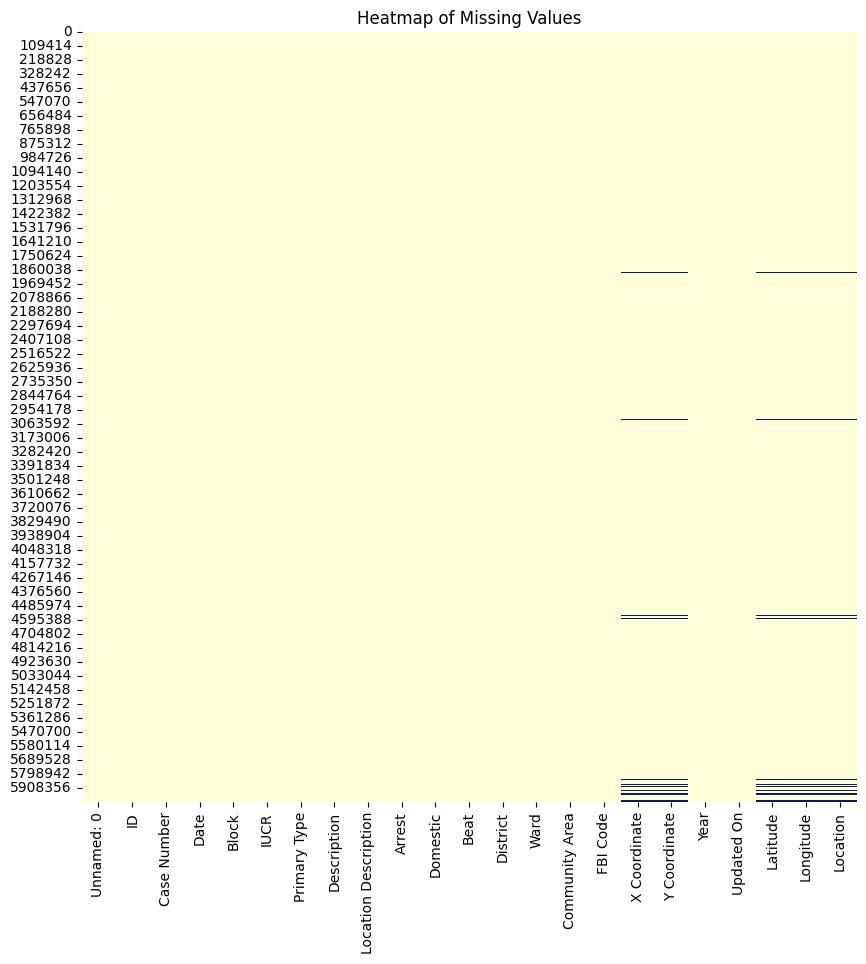

In [28]:
plt.figure(figsize=(10, 10))
sns.heatmap(chicago_df.isnull(), cbar=False, cmap='YlGnBu')
plt.title("Heatmap of Missing Values")
plt.show()

In [29]:
chicago_df.drop(['Unnamed: 0', 'Case Number', 'ID', 'IUCR', 'X Coordinate', 'Y Coordinate', 'Updated On', 'Year', 'FBI Code', 'Beat', 'Ward', 'Community Area', 'District', 'Latitude', 'Longitude'], inplace = True, axis = 1)



In [31]:
chicago_df.Date = pd.to_datetime(chicago_df.Date, format='%m/%d/%Y %I:%M:%S %p')

In [33]:
chicago_df.Date.head(10)

,Date
0,2006-04-02 13:00:00
1,2006-02-26 13:40:48
2,2006-01-08 23:16:00
3,2006-04-05 18:45:00
4,2006-02-17 21:03:14
5,2006-03-30 22:30:00
6,2006-04-05 12:10:00
7,2006-04-05 15:00:00
8,2006-04-05 21:30:00
9,2006-04-03 03:00:00


In [46]:
chicago_df.index = pd.DatetimeIndex(chicago_df.Date)

In [34]:
chicago_df

,Date,Block,Primary Type,Description,Location Description,Arrest,Domestic,Location
0,2006-04-02 13:00:00,055XX N MANGO AVE,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,False,"(41.981912692, -87.771996382)"
1,2006-02-26 13:40:48,065XX S RHODES AVE,NARCOTICS,MANU/DELIVER:CRACK,SIDEWALK,True,False,"(41.775732538, -87.611919814)"
2,2006-01-08 23:16:00,013XX E 69TH ST,ASSAULT,AGGRAVATED: HANDGUN,OTHER,False,False,"(41.769897392, -87.593670899)"
3,2006-04-05 18:45:00,061XX W NEWPORT AVE,BATTERY,SIMPLE,RESIDENCE,False,False,"(41.942984005, -87.780056951)"
4,2006-02-17 21:03:14,037XX W 60TH ST,NARCOTICS,POSS: CANNABIS 30GMS OR LESS,ALLEY,True,False,"(41.784210853, -87.71674491)"
...,...,...,...,...,...,...,...,...
6017762,2016-05-03 23:33:00,026XX W 23RD PL,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,True,True,"(41.849222028, -87.69155551)"
6017763,2016-05-03 23:30:00,073XX S HARVARD AVE,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,True,True,"(41.760743949, -87.63333531)"
6017764,2016-05-03 00:15:00,024XX W 63RD ST,BATTERY,AGGRAVATED: HANDGUN,SIDEWALK,False,False,"(41.779234743, -87.685207125)"
6017765,2016-05-03 21:07:00,082XX S EXCHANGE AVE,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,True,"(41.745251975, -87.552773464)"


In [35]:
chicago_df['Primary Type'].value_counts()

,count
Primary Type,
THEFT,1245111
BATTERY,1079178
CRIMINAL DAMAGE,702702
NARCOTICS,674831
BURGLARY,369056
OTHER OFFENSE,368169
ASSAULT,360244
MOTOR VEHICLE THEFT,271624
ROBBERY,229467


In [37]:
chicago_df['Primary Type'].value_counts().iloc[:15]

,count
Primary Type,
THEFT,1245111
BATTERY,1079178
CRIMINAL DAMAGE,702702
NARCOTICS,674831
BURGLARY,369056
OTHER OFFENSE,368169
ASSAULT,360244
MOTOR VEHICLE THEFT,271624
ROBBERY,229467


In [39]:
order_data = chicago_df['Primary Type'].value_counts().iloc[:15].index

<ipython-input-42-a22092c935f6>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'Primary Type', data = chicago_df, order = order_data, palette=palette)


<Axes: xlabel='count', ylabel='Primary Type'>

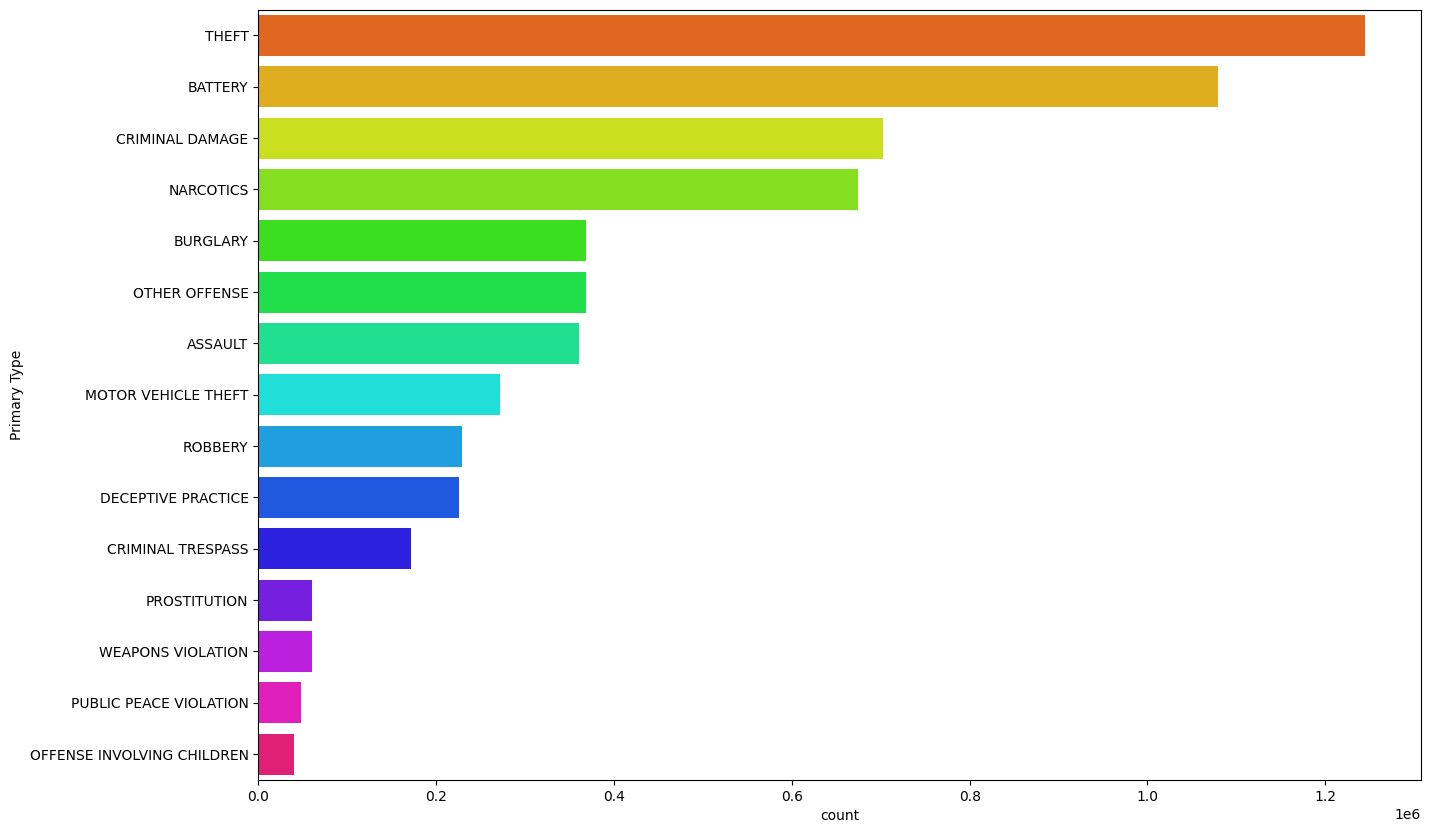

In [42]:
plt.figure(figsize = (15, 10))
palette = sns.color_palette("hsv", len(order_data))
sns.countplot(y = 'Primary Type', data = chicago_df, order = order_data, palette=palette)


<ipython-input-44-9dd00f69dbad>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index, palette=palette)


<Axes: xlabel='count', ylabel='Location Description'>

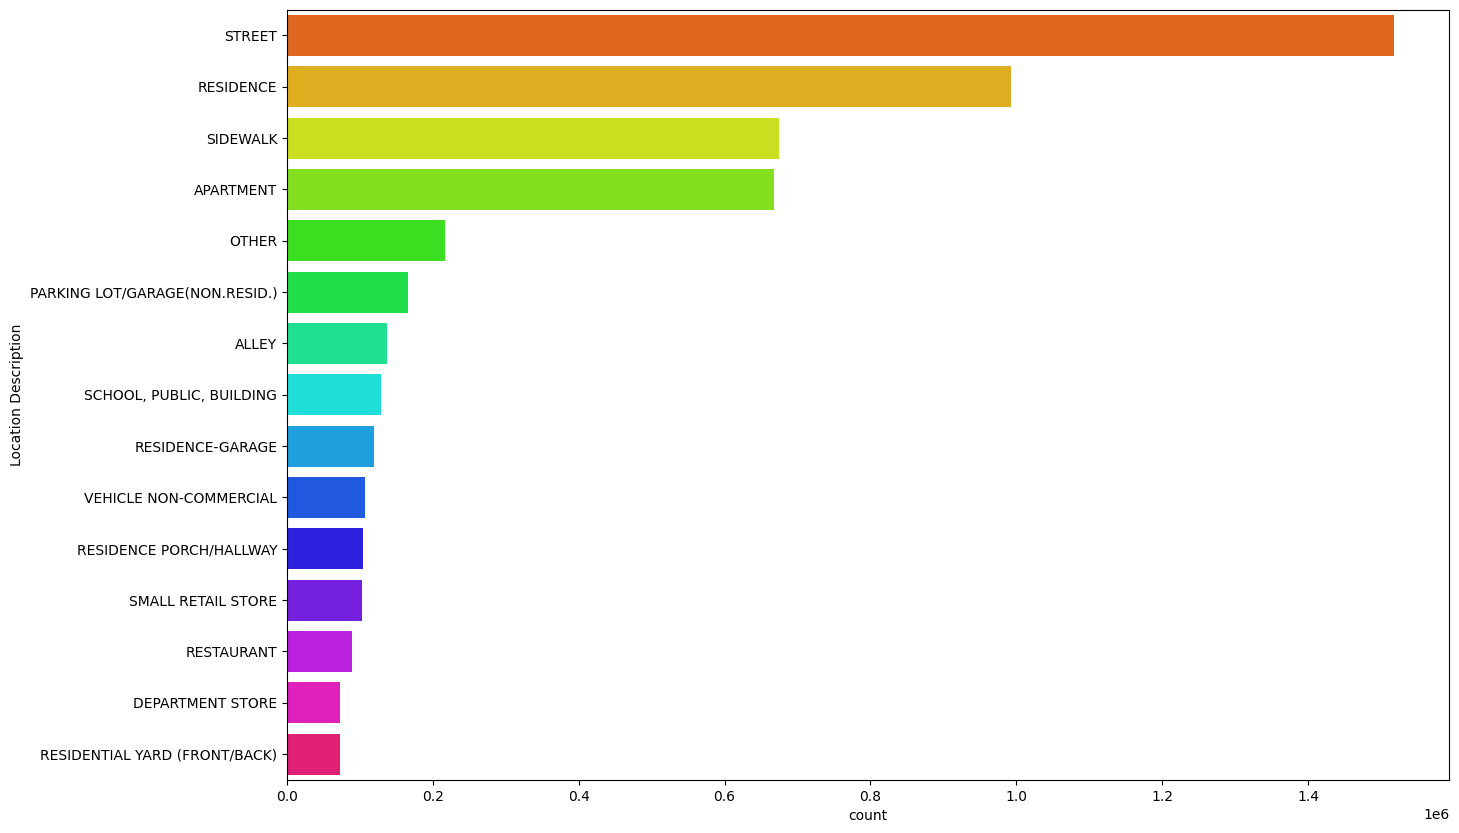

In [44]:
plt.figure(figsize = (15, 10))
palette = sns.color_palette("hsv", len(order_data))
sns.countplot(y = 'Location Description', data = chicago_df, order = chicago_df['Location Description'].value_counts().iloc[:15].index, palette=palette)

<ipython-input-50-dcdcc29eb6c3>:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  plt.plot(chicago_df.resample('Y').size())


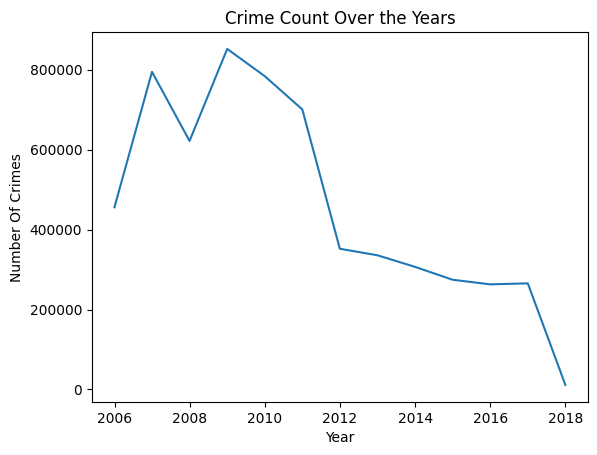

In [50]:
# Corrected code
plt.plot(chicago_df.resample('Y').size())
plt.title('Crime Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Number Of Crimes')
plt.show()


<ipython-input-51-752499da71d4>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(chicago_df.resample('M').size())


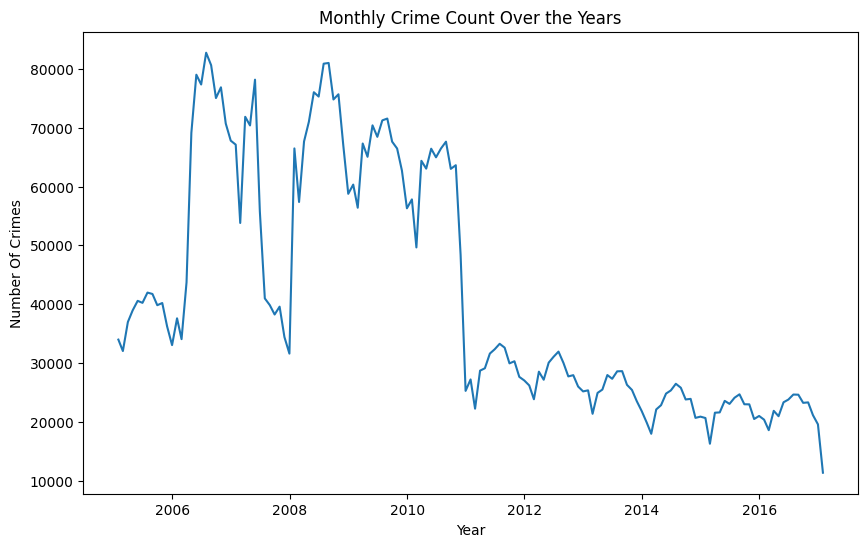

In [51]:
plt.figure(figsize=(10, 6))
plt.plot(chicago_df.resample('M').size())
plt.title('Monthly Crime Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Number Of Crimes')
plt.show()


<ipython-input-52-3f4b131bd50b>:2: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  plt.plot(chicago_df.resample('Q').size())


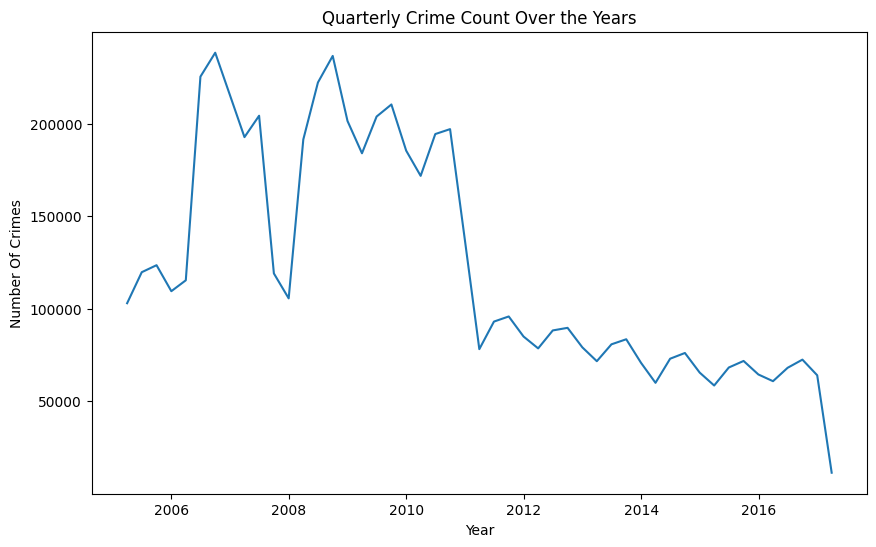

In [52]:
plt.figure(figsize=(10, 6))
plt.plot(chicago_df.resample('Q').size())
plt.title('Quarterly Crime Count Over the Years')
plt.xlabel('Year')
plt.ylabel('Number Of Crimes')
plt.show()


In [53]:
chicago_prophet = chicago_df.resample('M').size().reset_index()

<ipython-input-53-406ed1a9b398>:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  chicago_prophet = chicago_df.resample('M').size().reset_index()


In [54]:
chicago_prophet

,Date,0
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [55]:
chicago_prophet.columns = ['Date', 'Crime Count']

In [56]:
chicago_prophet

,Date,Crime Count
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [57]:
chicago_prophet_df_final = chicago_prophet.rename(columns={'Date': 'ds', 'Crime Count': 'y'})

In [58]:
chicago_prophet_df_final

,ds,y
0,2005-01-31,33983
1,2005-02-28,32042
2,2005-03-31,36970
3,2005-04-30,38963
4,2005-05-31,40572
...,...,...
140,2016-09-30,23235
141,2016-10-31,23314
142,2016-11-30,21140
143,2016-12-31,19580


In [66]:
m = Prophet()
m.fit(chicago_prophet_df_final)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuk0xiypv/1qxpn1qv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpuk0xiypv/9820a0r0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20537', 'data', 'file=/tmp/tmpuk0xiypv/1qxpn1qv.json', 'init=/tmp/tmpuk0xiypv/9820a0r0.json', 'output', 'file=/tmp/tmpuk0xiypv/prophet_modelc0lag91p/prophet_model-20241101062958.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
06:29:58 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
06:29:58 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [67]:
future = m.make_future_dataframe(periods=730) # or 365
forecast = m.predict(future)

In [68]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2005-01-31,60454.750250,39086.583592,72222.291695,60454.750250,60454.750250,-4762.406203,-4762.406203,-4762.406203,-4762.406203,-4762.406203,-4762.406203,0.0,0.0,0.0,55692.344047
1,2005-02-28,60322.347154,34205.896541,67451.255522,60322.347154,60322.347154,-9500.516982,-9500.516982,-9500.516982,-9500.516982,-9500.516982,-9500.516982,0.0,0.0,0.0,50821.830172
2,2005-03-31,60175.758011,40612.016847,75453.529825,60175.758011,60175.758011,-1224.153855,-1224.153855,-1224.153855,-1224.153855,-1224.153855,-1224.153855,0.0,0.0,0.0,58951.604157
3,2005-04-30,60033.897551,43594.928741,77160.485357,60033.897551,60033.897551,1182.825528,1182.825528,1182.825528,1182.825528,1182.825528,1182.825528,0.0,0.0,0.0,61216.723079
4,2005-05-31,59887.308409,49030.985782,81859.978589,59887.308409,59887.308409,5498.249807,5498.249807,5498.249807,5498.249807,5498.249807,5498.249807,0.0,0.0,0.0,65385.558216
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
870,2019-01-27,5334.291420,-16018.041690,17300.909749,4821.736241,5778.167820,-4991.605074,-4991.605074,-4991.605074,-4991.605074,-4991.605074,-4991.605074,0.0,0.0,0.0,342.686346
871,2019-01-28,5321.224598,-16157.145708,17434.170985,4807.376596,5765.731797,-4936.484335,-4936.484335,-4936.484335,-4936.484335,-4936.484335,-4936.484335,0.0,0.0,0.0,384.740263
872,2019-01-29,5308.157775,-17838.790597,15886.758525,4793.016951,5753.195717,-4881.377057,-4881.377057,-4881.377057,-4881.377057,-4881.377057,-4881.377057,0.0,0.0,0.0,426.780718
873,2019-01-30,5295.090953,-17543.907387,15893.904562,4778.657307,5740.762565,-4829.037548,-4829.037548,-4829.037548,-4829.037548,-4829.037548,-4829.037548,0.0,0.0,0.0,466.053406


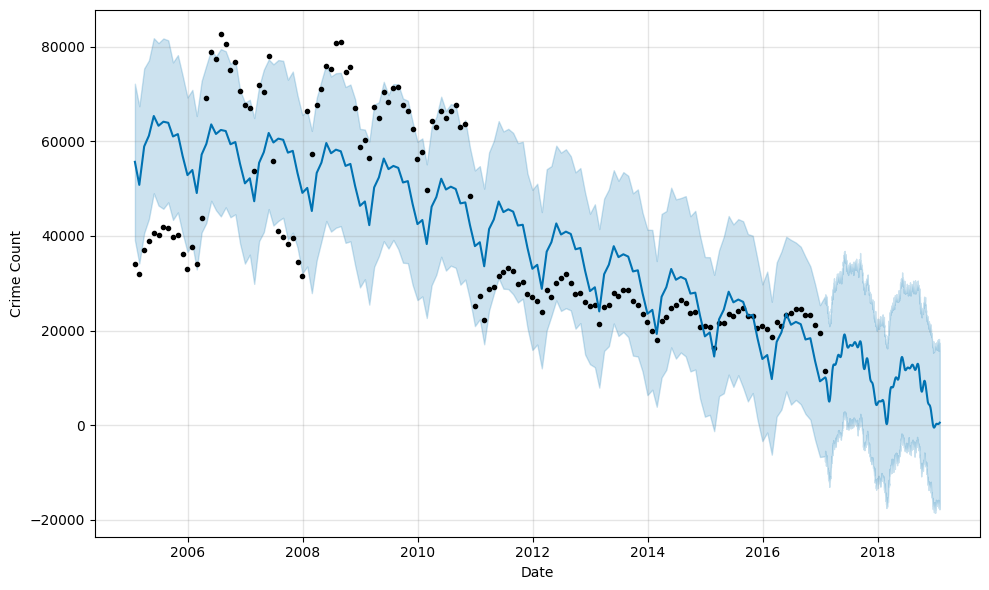

In [69]:
figure = m.plot(forecast, xlabel = 'Date', ylabel = 'Crime Count')

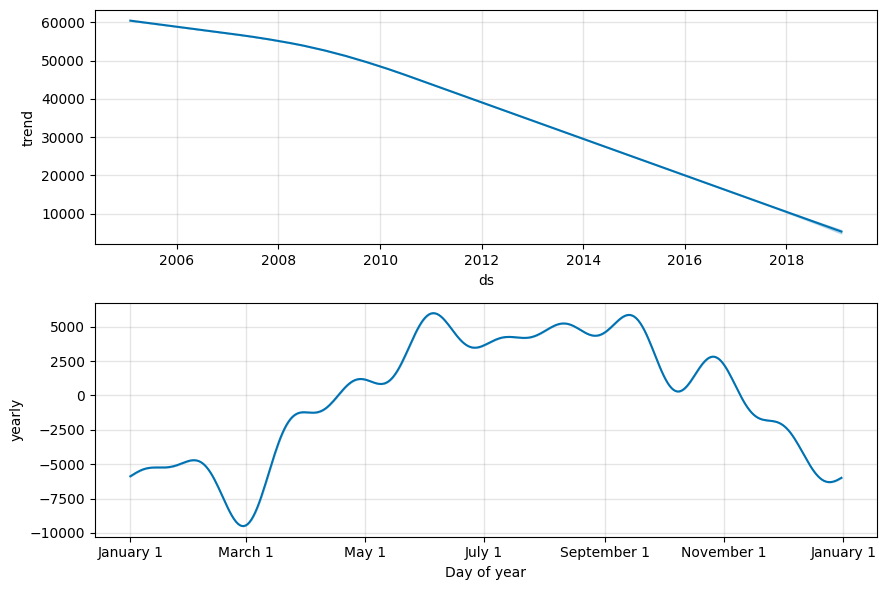

In [70]:
figure = m.plot_components(forecast)